# Define the Problem

For this project, the problem statement is given to us on a golden plater, develop an algorithm to predict the survival outcome of passengers on the Titanic.
In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy. <br>
- Tools
    - It's a classic **Binary classification**. 
- Data
    - The dataset is given to us on a golden plater with test and train data at Kaggle's Titanic: Machine Learning from Disaster
    
***A warm reminder: If you haven't read [Titanic Top 11%| Starter I: Models Comparing](https://www.kaggle.com/chienhsianghung/titanic-top-11-starter-i-models-comparing) yet, go there first!***

# Data Preprocessing

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
data_raw = pd.read_csv('../input/titanic/train.csv')
data_val = pd.read_csv('../input/titanic/test.csv')
data1 = data_raw.copy(deep=True)
data_cleaner = [data1, data_val]

Target = ['Survived']

In [3]:
for dataset in data_cleaner:
    print(dataset.info())
    print(dataset.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
        PassengerId    Survived      Pclass                              Name  \
count    891.000000  891.000000  891.000000                               891   
unique          NaN         NaN         NaN                               891

# Data Preprocessing- Fill Na

In [4]:
for dataset in data_cleaner:
    dataset.Age.fillna(dataset.Age.median(), inplace=True)
    dataset.Embarked.fillna('S', inplace=True)
    dataset.Fare.fillna(dataset.Fare.median(), inplace=True)
    # dataset['Title'] = dataset.Name.str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
    dataset['Family_members'] = dataset.Parch + dataset.SibSp

In [5]:
data1.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_members
424,425,0,3,"Rosblom, Mr. Viktor Richard",male,18.0,1,1,370129,20.2125,NaN,S,2
779,780,1,1,"Robert, Mrs. Edward Scott (Elisabeth Walton Mc...",female,43.0,0,1,24160,211.3375,B3,S,1
710,711,1,1,"Mayne, Mlle. Berthe Antonine (""Mrs de Villiers"")",female,24.0,0,0,PC 17482,49.5042,C90,C,0
531,532,0,3,"Toufik, Mr. Nakli",male,28.0,0,0,2641,7.2292,NaN,C,0
238,239,0,2,"Pengelly, Mr. Frederick William",male,19.0,0,0,28665,10.5000,NaN,S,0


# Simple Data Visualization (for setting bins)

In [6]:
data1.drop(['Name', 'PassengerId', 'Ticket', 'SibSp', 'Parch'], axis=1, inplace=True)

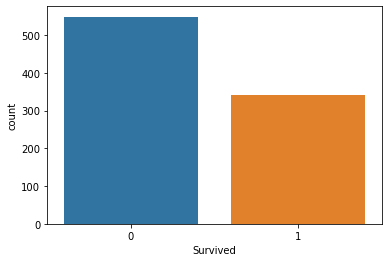

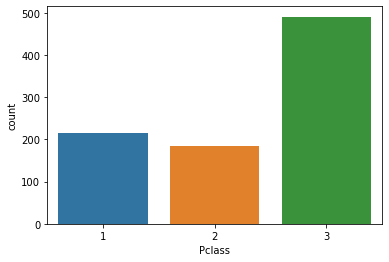

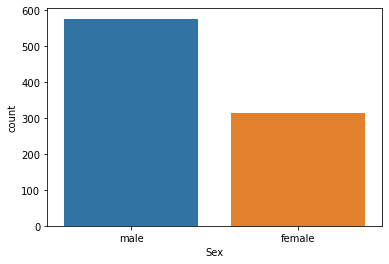

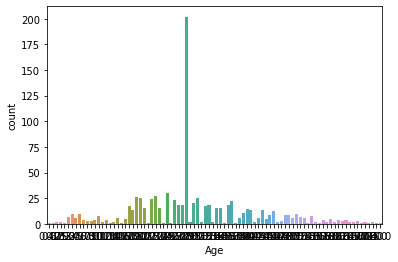

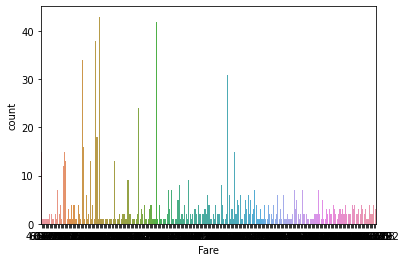

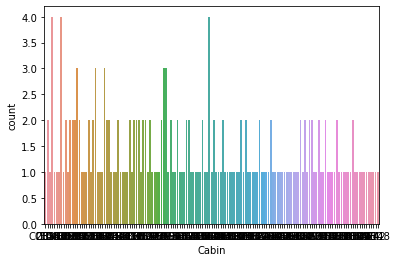

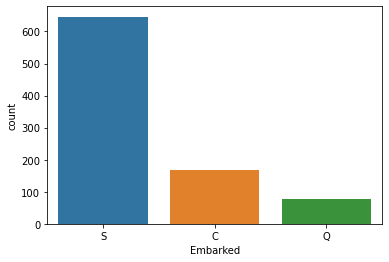

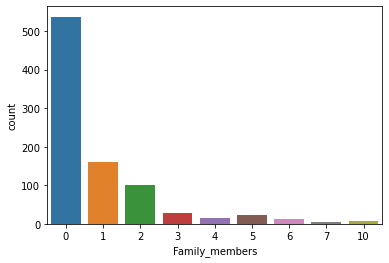

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

for i in data1.columns:
    sns.countplot(data1[i])
    plt.show()

# Data preprocessing- Cabin

In [8]:
# data1.groupby(data1['Cabin'].isnull()).mean()
data1.groupby(data1['Cabin'].isnull())['Survived'].mean()

Cabin
False    0.666667
True     0.299854
Name: Survived, dtype: float64

In [9]:
for dataset in data_cleaner:
    dataset['Cabin_Allotted'] = np.where(dataset.Cabin.isnull(), 0, 1)
    dataset.drop('Cabin', axis=1, inplace=True)

In [10]:
data1.sample(5)
# data1['Title'].value_counts()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family_members,Cabin_Allotted
74,1,3,male,32.0,56.4958,S,0,0
326,0,3,male,61.0,6.2375,S,0,0
298,1,1,male,28.0,30.5000,S,0,1
670,1,2,female,40.0,39.0000,S,2,0
114,0,3,female,17.0,14.4583,C,0,0


# Data Preprocessing- Encoder

It all goes on how you explain your feature's (X) effect on the final prediction (Y).<br>
Let's take a look at the feature `Fare`. <br>
Do you think the Fare's increment like 1 dollar would make any significant impact on their survival rate?<br>
The answer is quite obvious, right? But what if we raise the increment to i.e. 30 dollars..? Hard to tell huh!<br>
Again, it all goes on how you interpret data. In this case, I've tried them so many times. And I received the better result by *categoricalization* on `Fare` in most of them.

In [11]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()

for dataset in data_cleaner:
    dataset['Sex_labeled'] = lb.fit_transform(dataset.Sex)
    
    dataset['AgeBin'] = pd.qcut(dataset.Age, 3)
    dataset['Age_labeled'] = lb.fit_transform(dataset['AgeBin'])

    dataset['FareBin'] = pd.qcut(dataset.Fare, 4)
    dataset['Fare_labeled'] = lb.fit_transform(dataset['FareBin'])

    dataset['Embarked_labeled'] = lb.fit_transform(dataset.Embarked)

In [12]:
data1.sample(5)

,Survived,Pclass,Sex,Age,Fare,Embarked,Family_members,Cabin_Allotted,Sex_labeled,AgeBin,Age_labeled,FareBin,Fare_labeled,Embarked_labeled
530,1,2,female,2.0,26.0000,S,2,0,0,"(0.419, 25.0]",0,"(14.454, 31.0]",2,2
829,1,1,female,62.0,80.0000,S,0,1,0,"(31.0, 80.0]",2,"(31.0, 512.329]",3,2
338,1,3,male,45.0,8.0500,S,0,0,1,"(31.0, 80.0]",2,"(7.91, 14.454]",1,2
428,0,3,male,28.0,7.7500,Q,0,0,1,"(25.0, 31.0]",1,"(-0.001, 7.91]",0,1
826,0,3,male,28.0,56.4958,S,0,0,1,"(25.0, 31.0]",1,"(31.0, 512.329]",3,2


In [13]:
print(data1['Age_labeled'].value_counts())
print(data1['Fare_labeled'].value_counts())

1    304
0    301
2    286
Name: Age_labeled, dtype: int64
1    224
0    223
3    222
2    222
Name: Fare_labeled, dtype: int64


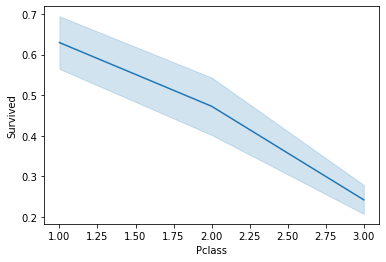

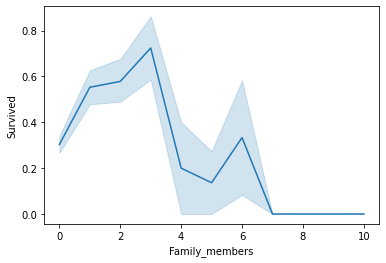

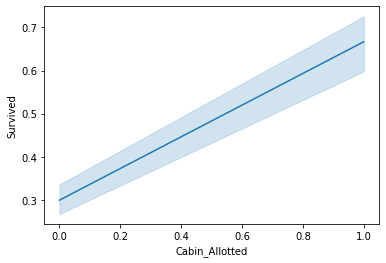

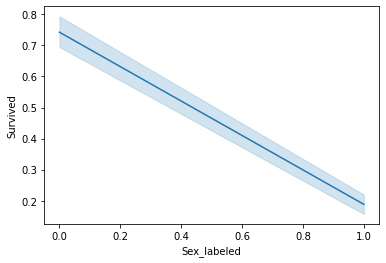

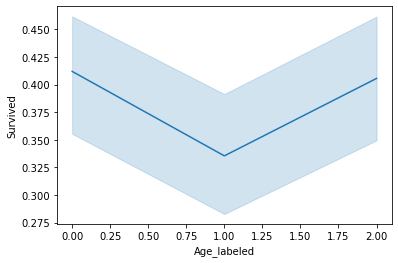

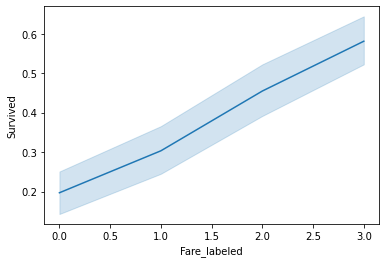

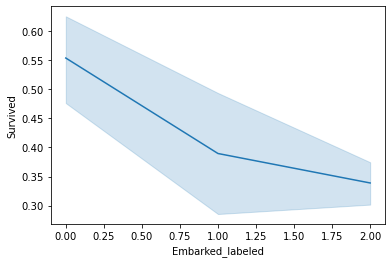

In [14]:
data1_X = [
    'Pclass', 
    'Family_members', 
    'Cabin_Allotted', 
    'Sex_labeled', 
    'Age_labeled', 
    'Fare_labeled', 
    'Embarked_labeled'
]

for i in data1[data1_X].columns:
    sns.lineplot(i, 'Survived', data=data1)
    plt.show()

In [15]:
data1[data1_X].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Pclass            891 non-null    int64
 1   Family_members    891 non-null    int64
 2   Cabin_Allotted    891 non-null    int64
 3   Sex_labeled       891 non-null    int64
 4   Age_labeled       891 non-null    int64
 5   Fare_labeled      891 non-null    int64
 6   Embarked_labeled  891 non-null    int64
dtypes: int64(7)
memory usage: 48.9 KB


# Models Selection

In [16]:
from sklearn import ensemble, tree, neighbors
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn import model_selection

MLA = [
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    neighbors.KNeighborsClassifier(), 

    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(), 

    XGBClassifier(objective='binary:logistic', eval_metric='logloss'),
    LGBMClassifier()
]

cv_split = model_selection.ShuffleSplit(n_splits=10, test_size=.2, train_size=.8, random_state=1)

MLA_columns = ['MLA Name', 'MLA Parameters', 'MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD', 'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

row_index = 0
for alg in MLA:
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())

    cv_results = model_selection.cross_validate(alg, data1[data1_X], data1[Target].values.reshape(-1,), cv=cv_split, return_train_score=True)

    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean() 
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3

    row_index += 1

# MLA_compare.sort_values(by=['MLA Test Accuracy Mean'], ascending=False, inplace=True)
MLA_compare

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
0,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': Non...",0.815449,0.784358,0.109183,0.0971476
1,BaggingClassifier,"{'base_estimator': None, 'bootstrap': True, 'b...",0.88132,0.77095,0.102221,0.0293482
2,ExtraTreesClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",0.885534,0.767598,0.0974952,0.159971
3,GradientBoostingClassifier,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...",0.848596,0.779888,0.116646,0.0949418
4,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.885534,0.765922,0.105587,0.21125
5,KNeighborsClassifier,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.84059,0.764804,0.0849474,0.0032464
6,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.885534,0.754749,0.0872314,0.00285563
7,ExtraTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.885534,0.761453,0.10811,0.00248332
8,XGBClassifier,"{'objective': 'binary:logistic', 'base_score':...",0.883848,0.771508,0.0987121,0.0444166
9,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",0.865309,0.779888,0.116405,0.0461882


# Combine Tuning with Models Selection

In [17]:
import time

grid_n_estimator = [10, 50, 100, 300]
grid_ratio = [.1, .25, .5, .75, 1.0]
grid_learn = [.01, .03, .05, .1, .25]
grid_max_depth = [1, 2, 3, 4, 5, 6, 7, 8, 10, None]
grid_min_samples = [5, 10, .03, .05, .10]
grid_criterion = ['gini', 'entropy']
# grid_bool = [True, False]
grid_seed = [1]

grid_param = [
    [{
        # Ada
        'learning_rate': grid_learn, 
        'n_estimators': grid_n_estimator, 
        'random_state': grid_seed
    }], 
    [{
        # Bagging
        'max_samples': grid_ratio, 
        'n_estimators': grid_n_estimator, 
        'random_state': grid_seed
    }],
    [{
        # e.ExtraTrees
        'n_estimators': grid_n_estimator, 
        'criterion': grid_criterion, 
        'max_depth': grid_max_depth, 
        'random_state': grid_seed
    }],
    [{
        # GBC
        'learning_rate': grid_learn,
        'n_estimators': grid_n_estimator,
        'max_depth': grid_max_depth,
        'random_state': grid_seed
    }], 
    [{
        # RandomForestClassifier
        'n_estimators': grid_n_estimator,
        'criterion': grid_criterion, 
        'max_depth': grid_max_depth[:-1], 
        'random_state': grid_seed, 
        # 'oob_score': grid_bool
        # otherwise there will ba an error:
        # UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
    }], 
    [{
        # KN
        'n_neighbors': grid_max_depth[:-1], 
        # Otherwise, there will be a TypeError: '>' not supported between instances of 'NoneType' and 'int', because of [None].
        # the others are likewise
        'weights': ['uniform', 'distance'], 
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    }], 
    [{
        # DTC
        'criterion': grid_criterion, 
        'max_depth': grid_max_depth, 
        'random_state': grid_seed, 
    }], 
    [{
        # t.ExtraTree
        'criterion': grid_criterion, 
        'max_depth': grid_max_depth, 
        'random_state': grid_seed, 
    }],
    [{
        # XGB
        'learning_rate': grid_learn,
        'max_depth': grid_max_depth[:-1],
        'n_estimators': grid_n_estimator, 
        'seed': grid_seed, 
        'objective': ['binary:logistic'], 
        'eval_metric': ['logloss']     
    }],
    [{
        # LGBM
        'n_estimators': [1000, 1500, 2000, 2500],
        'max_depth':  [4, 5, 11, -1], # [4, 5, 8, 11, -1]
        'num_leaves': [15, 31, 58, 127], # [15, 31, 58, 63, 127]
        'subsample': [0.6, 0.708, 0.8, 1.0], # [0.6, 0.7, 0.708, 0.8, 1.0]
        'colsample_bytree': [0.613, 0.7, 0.8, 1.0], # [0.6, 0.613, 0.7, 0.8, 1.0]
        'learning_rate' : [0.01, 0.02, 0.03]
    }]
]

row_index = 0

start_total = time.perf_counter()

for clf, param in zip(MLA, grid_param):
    # tuning_____________________________________________________
    start = time.perf_counter()
    
    best_search = model_selection.GridSearchCV(estimator = clf, 
                                               param_grid = param, 
                                               cv = cv_split, 
                                               scoring = 'roc_auc', 
                                               return_train_score = True)
    best_search.fit(data1[data1_X], data1[Target].values.reshape(-1,))
    
    run = time.perf_counter() - start

    best_param = best_search.best_params_
    print(f'The best parameter for {clf.__class__.__name__} is {best_param} with a runtime of {run:.2f} seconds.')
    print('-'*60)
    clf.set_params(**best_param)

    # cross validating____________________________________________
    MLA_name = clf.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(clf.get_params())
    
    # https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
    MLA_compare.loc[row_index, 'MLA Time'] = np.asarray(best_search.cv_results_['mean_fit_time']).mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = np.asarray(best_search.cv_results_['mean_train_score']).mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = np.asarray(best_search.cv_results_['mean_test_score']).mean() 
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = np.asarray(best_search.cv_results_['mean_test_score']).std()*3

    row_index += 1

run_total = time.perf_counter() - start_total

print('-'*60)
print(f'Total optimization time was {run_total / 60:.2f} minutes.')
print('-'*60)

MLA_compare.sort_values(by=['MLA Test Accuracy Mean'], ascending=False, inplace=True)
MLA_compare

The best parameter for AdaBoostClassifier is {'learning_rate': 0.1, 'n_estimators': 100, 'random_state': 1} with a runtime of 55.69 seconds.
------------------------------------------------------------
The best parameter for BaggingClassifier is {'max_samples': 0.1, 'n_estimators': 300, 'random_state': 1} with a runtime of 67.82 seconds.
------------------------------------------------------------
The best parameter for ExtraTreesClassifier is {'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 100, 'random_state': 1} with a runtime of 163.31 seconds.
------------------------------------------------------------
The best parameter for GradientBoostingClassifier is {'learning_rate': 0.25, 'max_depth': 3, 'n_estimators': 50, 'random_state': 1} with a runtime of 742.69 seconds.
------------------------------------------------------------
The best parameter for RandomForestClassifier is {'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 50, 'random_state': 1} with a runtime of 20

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
8,XGBClassifier,"{'objective': 'binary:logistic', 'base_score':...",0.8997,0.838522,0.0442204,0.0452596
9,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",0.934999,0.837812,0.0277973,0.572631
4,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.896478,0.837186,0.030514,0.244112
1,BaggingClassifier,"{'base_estimator': None, 'bootstrap': True, 'b...",0.928761,0.828722,0.0293272,0.292181
2,ExtraTreesClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",0.895928,0.828266,0.0583896,0.167359
0,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': Non...",0.840125,0.821736,0.0935622,0.222489
3,GradientBoostingClassifier,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...",0.919527,0.819258,0.0828352,0.359524
6,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.892295,0.81015,0.0884831,0.00337161
5,KNeighborsClassifier,"{'algorithm': 'brute', 'leaf_size': 30, 'metri...",0.907294,0.790696,0.0905365,0.00295559
7,ExtraTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.825607,0.759394,0.206249,0.00321792


# Submit

In [18]:
model = LGBMClassifier(**{'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 1000, 'num_leaves': 15, 'subsample': 0.6})
model.fit(data1[data1_X], data1[Target].values.reshape(-1, ))
predictions = model.predict(data_val[data1_X])

output = pd.DataFrame({'PassengerId': data_val.PassengerId, 'Survived': predictions})
output.to_csv('./my_submission_RandomForestClassifier_tunned_F4.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


# Next: Synthanic Titanic

Tabular Playground Series - Apr 2021

The dataset is used for this competition is synthetic but based on a real dataset (in this case, the actual [Titanic data](https://www.kaggle.com/c/titanic/data)!) and generated using a CTGAN. The statistical properties of this dataset are very similar to the original Titanic dataset, but there's no way to "cheat" by using public labels for predictions. How well does your model perform on truly private test labels?

Good luck and have fun!

You can start from [here](https://www.kaggle.com/chienhsianghung/tps-apr-starter-pack-all-models).

# References
* [A Data Science Framework: To Achieve 99% Accuracy](https://www.kaggle.com/ldfreeman3/a-data-science-framework-to-achieve-99-accuracy)
* [MY FIRST KAGGLE WORK TITANIC](https://www.kaggle.com/saptarshisit/my-first-kaggle-work-titanic)